## Whisper API implement to Podcast for 語音轉文字

In [1]:
# Import necessary libraries
## 設定 OpenAI API Key 變數
from dotenv import load_dotenv
import os

# Load the environment variables from .env file
load_dotenv()

# Access the API key
openai_api_key = os.getenv('OPENAI_API_KEY')


In [2]:
import requests
import json
from pprint import pp

In [3]:
def get_completion(messages, model="gpt-3.5-turbo", temperature=0, max_tokens=4000):
  payload = { "model": model, "temperature": temperature, "messages": messages, "max_tokens": max_tokens }
  headers = { "Authorization": f'Bearer {openai_api_key}', "Content-Type": "application/json" }
  response = requests.post('https://api.openai.com/v1/chat/completions', headers = headers, data = json.dumps(payload) )
  obj = json.loads(response.text)
  if response.status_code == 200 :
    return obj["choices"][0]["message"]["content"]
  else :
    return obj["error"]

In [4]:
# !pip install feedparser -q


## 解析 podcast 音訊檔案

In [5]:
import feedparser
# 數位時代 https://open.firstory.me/user/bnext
podcast_feed_url = "https://open.firstory.me/rss/user/ckkqnneka7mxc0866j53j5ljw"
podcast_feed = feedparser.parse(podcast_feed_url)
print ("The number of podcast entries is ", len(podcast_feed.entries))

The number of podcast entries is  594


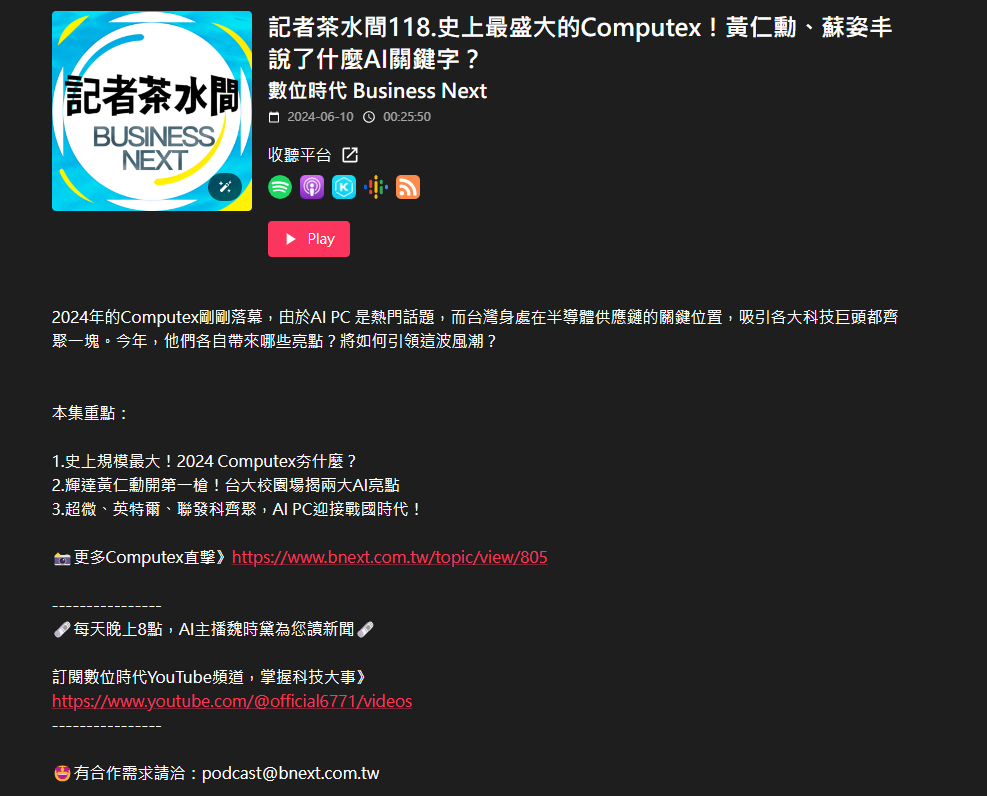

In [6]:
podcast_feed["entries"][0]["title_detail"]

{'type': 'text/plain',
 'language': None,
 'base': 'https://feed.firstory.me/rss/user/ckkqnneka7mxc0866j53j5ljw',
 'value': '記者茶水間118.史上最盛大的Computex！黃仁勳、蘇姿丰說了什麼AI關鍵字？'}

In [7]:
print(podcast_feed.entries[0])

{'title': '記者茶水間118.史上最盛大的Computex！黃仁勳、蘇姿丰說了什麼AI關鍵字？', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'https://feed.firstory.me/rss/user/ckkqnneka7mxc0866j53j5ljw', 'value': '記者茶水間118.史上最盛大的Computex！黃仁勳、蘇姿丰說了什麼AI關鍵字？'}, 'summary': '<p>2024年的Computex剛剛落幕，由於AI PC 是熱門話題，而台灣身處在半導體供應鏈的關鍵位置，吸引各大科技巨頭都齊聚一塊。今年，他們各自帶來哪些亮點？將如何引領這波風潮？ <br /> <br /> <br />本集重點： <br /> <br />1.史上規模最大！2024 Computex夯什麼？ <br />2.輝達黃仁勳開第一槍！台大校園場揭兩大AI亮點 <br />3.超微、英特爾、聯發科齊聚，AI PC迎接戰國時代！ <br /> <br />📸更多Computex直擊》<a href="https://www.bnext.com.tw/topic/view/805" target="_blank">https://www.bnext.com.tw/topic/view/805</a> <br /> <br />---------------- <br />🗞️每天晚上8點，AI主播魏時黛為您讀新聞🗞️ <br /> <br />訂閱數位時代YouTube頻道，掌握科技大事》 <br /><a href="https://www.youtube.com/@official6771/videos" target="_blank">https://www.youtube.com/@official6771/videos</a> <br />---------------- <br /> <br />🤩有合作需求請洽：podcast@bnext.com.tw <br /></p> <br /> <br />Powered by <a href="https://firstory.me">Firstory Hosting</a>', 'summary_det

In [8]:
podcast_feed["entries"][0]["links"]

[{'rel': 'alternate',
  'type': 'text/html',
  'href': 'https://open.firstory.me/story/clx8udn3a002f01wcfc0i880r'},
 {'length': '25003476',
  'type': 'audio/mpeg',
  'href': 'https://chrt.fm/track/AD8A17/m.cdn.firstory.me/track/ckkqnneka7mxc0866j53j5ljw/clx8udn3a002f01wcfc0i880r/https%3A%2F%2Fd3mww1g1pfq2pt.cloudfront.net%2FRecord%2Fckkqnneka7mxc0866j53j5ljw%2Fclx8udn3a002g01wc9b5qfgho.mp3?v=1718016045177',
  'rel': 'enclosure'}]

In [9]:
# 挑個檔案最小的那筆
episode_length = 30003476
episode_title = ''
for item in podcast_feed.entries[0:10]:
  for link in item.links:
    if (link['type'] == 'audio/mpeg'):
      if int(link.length) < episode_length:
        episode_url = link.href
        episode_length = int(link.length)
        episode_title = item.title
        print(episode_title, episode_length)
          


 # -O = output 成特定檔案名



記者茶水間118.史上最盛大的Computex！黃仁勳、蘇姿丰說了什麼AI關鍵字？ 25003476
記者茶水間117.台灣又有新航空！沅星航空創辦人專訪幕後：有錢就是任性嗎？ 18629433


In [10]:
episode_url

'https://chrt.fm/track/AD8A17/m.cdn.firstory.me/track/ckkqnneka7mxc0866j53j5ljw/clwz3ivz729fr01uk1wh06zms/https%3A%2F%2Fd3mww1g1pfq2pt.cloudfront.net%2FRecord%2Fckkqnneka7mxc0866j53j5ljw%2Fclwz3ivz729fs01uk9mb7f40e.mp3?v=1717426738353'

In [11]:
import requests

def download_audio(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)
    print(f"Audio downloaded successfully and saved to {save_path}")


episode_url = episode_url  # 替換為實際的音訊URL
save_path = "./data/podcast_episode.mp3"
download_audio(episode_url, save_path)


# 你也可以使用 linux 指令下載
# !wget -O 'podcast_episode.mp3' {episode_url}


Audio downloaded successfully and saved to ./data/podcast_episode.mp3


## Whisper API

https://platform.openai.com/docs/api-reference/audio

* 上傳的檔案大小限制是 25 MB (如果超過，可以換別的 podcast 看看)
* 格式支援 mp3, mp4, mpeg, mpga, m4a, wav, webm

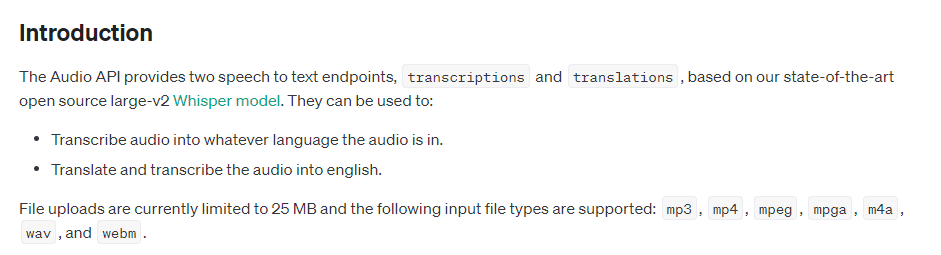

In [13]:
data = { "model": "whisper-1", "prompt": "Chinese Mandarin Taiwanese including punctuation" } # whisper 也可以有 prompt 指示
f = open('./data/podcast_episode.mp3', 'rb')
files = [("file", ("podcast_episode.mp3", f, "application/octet-stream"))]

headers = { "Authorization": f'Bearer {openai_api_key}' } # 不需要加 "Content-Type": "multipart/form-data" 我猜 request libray 幫你加了
response = requests.post('https://api.openai.com/v1/audio/transcriptions', 
                         headers = headers, 
                         data = data, 
                         files = files )

# 需要數分鐘來跑
podcast_transcript = response.text
pp(podcast_transcript)


('{\n'
 '  "text": "台灣又多一家航空公司了 但跟一般瞄準出國旅遊的公司不一樣 原興航空把客群鎖定在私人包機 究竟他要怎麼經營呢? 在台灣有市場嗎? '
 '今天我們就一起來認識一下這家新公司 歡迎回來本週的記者茶水間 那我們首先歡迎數位時代的記者 芷源 哈囉 我是芷源 好 '
 '那在節目開始之前我們要先跟大家工商一下 就是數位時代六月號的雜誌已經出刊囉 這次的主題是引領台灣破浪的創業家們 那我們在封面故事裡面訪問了四位創業家 '
 '之後也會推出相關的微電影還有一系列的活動 那歡迎大家先追蹤數位時代的臉書 IG 或者是官方LINE帳號 都可以獲得第一手資訊喔 那如果你是品牌的乾爹乾媽 '
 '想要將你的產品分享給更多數位時代的優質聽眾 也歡迎把相關的資訊寄到我們資訊欄中的email喔 嗯 沒錯 好 那工商時間結束 '
 '開頭呢已經簡單的介紹了一下今天的主題 就是之前討論度很高的新成立的原興航空 那我覺得大家應該都對這一間公司很好奇 因為就欸 成立了一個新的航空公司 '
 '可是看起來他的服務的市場跟我們大家一般的想像 就是那種出國玩啊這種好像不太一樣 那子緣可以先簡單幫我們介紹一下這家公司 嗯 因為像剛剛講的 '
 '就是他們公司其實要瞄準的就是私人包機服務 那我先講一下我們普遍現在有的私人包機模式 就是我們想像說欸有錢人可能就買一架飛機 那不管是怎麼樣有錢的人 '
 '他的飛機就是要掛在一家航空公司底下 就是所謂的托機代管 擁有一架私人飛機的成本其實比想像中還要高 就是你買一台飛機 即便是二手飛機就是飛了可能八年十年了 '
 '那大概也至少需要兩千萬美元 就是換算大概是六億 對六億台幣 但是這個只是買 買完之後你的託管費用 託管就是包含你可能維修啊 或是放在那邊就是保養什麼的 '
 '就是也要買車位啊 對對對你一架飛機光是停在人家的停機坪上 你都不要飛 那一年的維修費就要百萬幾甲 可能大概是一百二十萬美元左右 平均啦大概初戀的算 '
 '那就是新台幣大概三千多萬 所以托機代管才是這些私人包機公司 他們真正要賺的錢 就是每年的那個維修的這些錢 所以像這一間就是說 '
 '遠新航空他們瞄準的也是這個業務嗎 就是其中一部分啦 就是他瞄準的是這個托機代管這一件事情嗎 對他們其實要做的是托機代管 但會比較不一樣就是說 '
 '欸以前有那他們為什麼要做

In [15]:
podcast_transcript

'{\n  "text": "台灣又多一家航空公司了 但跟一般瞄準出國旅遊的公司不一樣 原興航空把客群鎖定在私人包機 究竟他要怎麼經營呢? 在台灣有市場嗎? 今天我們就一起來認識一下這家新公司 歡迎回來本週的記者茶水間 那我們首先歡迎數位時代的記者 芷源 哈囉 我是芷源 好 那在節目開始之前我們要先跟大家工商一下 就是數位時代六月號的雜誌已經出刊囉 這次的主題是引領台灣破浪的創業家們 那我們在封面故事裡面訪問了四位創業家 之後也會推出相關的微電影還有一系列的活動 那歡迎大家先追蹤數位時代的臉書 IG 或者是官方LINE帳號 都可以獲得第一手資訊喔 那如果你是品牌的乾爹乾媽 想要將你的產品分享給更多數位時代的優質聽眾 也歡迎把相關的資訊寄到我們資訊欄中的email喔 嗯 沒錯 好 那工商時間結束 開頭呢已經簡單的介紹了一下今天的主題 就是之前討論度很高的新成立的原興航空 那我覺得大家應該都對這一間公司很好奇 因為就欸 成立了一個新的航空公司 可是看起來他的服務的市場跟我們大家一般的想像 就是那種出國玩啊這種好像不太一樣 那子緣可以先簡單幫我們介紹一下這家公司 嗯 因為像剛剛講的 就是他們公司其實要瞄準的就是私人包機服務 那我先講一下我們普遍現在有的私人包機模式 就是我們想像說欸有錢人可能就買一架飛機 那不管是怎麼樣有錢的人 他的飛機就是要掛在一家航空公司底下 就是所謂的托機代管 擁有一架私人飛機的成本其實比想像中還要高 就是你買一台飛機 即便是二手飛機就是飛了可能八年十年了 那大概也至少需要兩千萬美元 就是換算大概是六億 對六億台幣 但是這個只是買 買完之後你的託管費用 託管就是包含你可能維修啊 或是放在那邊就是保養什麼的 就是也要買車位啊 對對對你一架飛機光是停在人家的停機坪上 你都不要飛 那一年的維修費就要百萬幾甲 可能大概是一百二十萬美元左右 平均啦大概初戀的算 那就是新台幣大概三千多萬 所以托機代管才是這些私人包機公司 他們真正要賺的錢 就是每年的那個維修的這些錢 所以像這一間就是說 遠新航空他們瞄準的也是這個業務嗎 就是其中一部分啦 就是他瞄準的是這個托機代管這一件事情嗎 對他們其實要做的是托機代管 但會比較不一樣就是說 欸以前有那他們為什麼要做 就以前的市場是說 台灣可能算是一個相對比較封閉的市場 我們其實聽過台灣有錢人可能就是 真的是金字塔頂端一趴的那些

In [16]:
import tiktoken
encoding = tiktoken.get_encoding("cl100k_base")
num_tokens = len(encoding.encode(podcast_transcript))
print(num_tokens)

9096


## 長文本摘要

### 方法一: zero shot

In [19]:
messages = [
    {
        "role": "system",
        "content": "(zh-tw) 你是一個擅長語言理解和摘要的高度熟練 AI。我希望你能閱讀以下文字並將其摘要成一個簡潔的段落。請盡量保留最重要的要點，提供一個連貫且易讀的摘要，使人能夠在不需要閱讀全文的情況下理解討論的主要內容。請避免不必要的細節或偏題的部分。"
    },
    {
        "role": "user",
        "content": podcast_transcript
    }
]

abstract_summary = get_completion(messages)
pp(abstract_summary)

'原興航空是台灣一家新興航空公司，專注於私人包機服務，提供托機代管業務。在台灣市場，有錢人擁有私人飛機，但維護成本高，原興航空的商業模式是讓飛機擁有者分享飛行時間，以租賃方式賺取額外收入。公司計畫擴展至旅遊、奢華旅遊等領域，並考慮成立私人包機維修中心。創辦人盧浩志是台商，曾在中國打拼，現回台創業。公司目前在審查階段，預計六月底開張，並計畫與旅行社合作拓展市場。整體而言，原興航空的商業模式創新，面臨挑戰但也有潛力，值得關注。'


### 方法二: zero shot 條列整理 點線大綱

### prompt 框架設計 - Executive Summary

Introduction（引言）：<br>
- 簡短介紹話題，說明背景和重要性。

Key Points（關鍵點）：<br>
- 列出時事評論的主要觀點，每個觀點用一兩句話概述。
- 重點突出，易於快速閱讀。

Implications（影響）：<br>
- 分析該時事對業務、行業或市場的潛在影響。
- 強調對公司戰略或決策的相關性。

Recommendations（建議）：<br>
- 根據評論內容，提出具體建議或行動步驟。
- 簡明扼要，直接指出可行方案。

Conclusion（結論）：<br>
- 總結主要觀點和建議。
- 簡潔有力，讓經理人能快速理解摘要的重點。


In [23]:
summarization_framwork = """

(zh-tw) 你是一個專精於將信息提煉成關鍵要點的高度熟練 AI。
根據以下文字，請識別並列出討論或提出的主要要點。這些應該是最重要的觀點、發現或主題，對於討論的本質至關重要。
你的目標是提供一個列表，讓人可以快速了解討論的內容。請確保你的回答符合Executive Summary框架，並且涵蓋了所有面向。

$$$ prompt 框架設計 - Executive Summary

Introduction（引言）：<br>
- 簡短介紹話題，說明背景和重要性。

Key Points（關鍵點）：<br>
- 列出時事評論的主要觀點，每個觀點用一兩句話概述。
- 重點突出，易於快速閱讀。

Implications（影響）：<br>
- 分析該時事對業務、行業或市場的潛在影響。
- 強調對公司戰略或決策的相關性。

Recommendations（建議）：<br>
- 根據評論內容，提出具體建議或行動步驟。
- 簡明扼要，直接指出可行方案。

Conclusion（結論）：<br>
- 總結主要觀點和建議。
- 簡潔有力，讓經理人能快速理解摘要的重點。

"""


messages = [
    {
    "role": "system",
    "content": summarization_framwork
    },
    {
        "role": "user",
        "content": podcast_transcript
    }
]

key_points = get_completion(messages, model = "gpt-4-turbo")
print(key_points)


### Introduction
原興航空是一家新成立的台灣航空公司，專注於提供私人包機服務。此公司的商業模式與傳統面向大眾的航空服務不同，主要針對高端市場，提供更個性化和專屬的飛行體驗。

### Key Points
1. **市場定位與服務特色**：
   - 原興航空主要提供私人包機和托機代管服務，針對的是需要高度隱私和靈活性的客戶群。
   - 公司計劃利用共享經濟模式，讓飛機擁有者可以出租未使用的飛行時數，創造額外收益。

2. **市場潛力與挑戰**：
   - 台灣的私人飛機市場相對封閉，但有潛在的成長空間。目前市場上私人飛機數量遠低於潛在需求。
   - 原興航空面臨的挑戰包括擴大客源、與旅行社合作推廣私人飛行服務，以及可能的國際擴展。

3. **創辦人背景與動機**：
   - 創辦人盧浩志是一位台商，擁有連接器製造業的背景。他因個人需求和市場缺口，決定創立原興航空。

### Implications
- **對高端旅遊市場的影響**：原興航空的服務可能會改變台灣及周邊地區的高端旅遊市場，提供更多私人化的旅行選擇。
- **對航空業的影響**：引入私人包機共享模式可能會為航空業帶來新的商業模式和收益來源。

### Recommendations
1. **市場教育與宣傳**：加強對潛在客戶的市場教育，明確傳達私人包機的優勢和可行性。
2. **建立合作夥伴關係**：與旅行社和企業建立合作，推廣私人飛機租賃服務。
3. **探索國際市場**：考慮擴展至東南亞等鄰近地區，利用台灣的地理優勢。

### Conclusion
原興航空的創立提供了一個新的高端旅遊選擇，其私人包機服務和共享經濟模式可能會對台灣及國際航空市場產生重要影響。公司需要有效地解決市場教育和客源擴展的挑戰，以實現其業務目標和增長潛力。
